In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [2]:
iris = load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
iris_df = pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df['Species'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
X = iris_df.drop(['Species'],axis=1)
y = iris_df['Species']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=17)

print(f'The dimension of X_train is :{X_train.shape}')
print(f'The dimension of X_test is :{X_test.shape}')

The dimension of X_train is :(105, 4)
The dimension of X_test is :(45, 4)


In [7]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train,y_train)

train_score = dt_classifier.score(X_train,y_train)
test_score = dt_classifier.score(X_test,y_test)

y_pred = dt_classifier.predict(X_test)
mse = mean_squared_error(y_test,y_pred)

print('Train score:',train_score)
print('Test score:',test_score)
print('Predict:',y_pred)
print('MSE:',mse)
print('R-MSE:',mse**(1/2.0))

Train score: 1.0
Test score: 0.9777777777777777
Predict: [0 1 2 1 2 2 1 2 1 2 2 0 1 0 2 0 0 2 2 2 1 0 2 1 1 1 1 1 0 1 0 1 0 0 1 1 1
 2 1 0 1 1 0 1 2]
MSE: 0.022222222222222223
R-MSE: 0.14907119849998599


In [8]:
from sklearn.tree import plot_tree

[Text(0.541667,0.928571,'X[3] <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [38, 31, 36]'),
 Text(0.458333,0.785714,'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(0.625,0.785714,'X[3] <= 1.75\ngini = 0.497\nsamples = 67\nvalue = [0, 31, 36]'),
 Text(0.416667,0.642857,'X[2] <= 5.35\ngini = 0.208\nsamples = 34\nvalue = [0, 30, 4]'),
 Text(0.333333,0.5,'X[0] <= 4.95\ngini = 0.117\nsamples = 32\nvalue = [0, 30, 2]'),
 Text(0.166667,0.357143,'X[3] <= 1.35\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.0833333,0.214286,'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.25,0.214286,'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5,0.357143,'X[2] <= 4.95\ngini = 0.064\nsamples = 30\nvalue = [0, 29, 1]'),
 Text(0.416667,0.214286,'gini = 0.0\nsamples = 27\nvalue = [0, 27, 0]'),
 Text(0.583333,0.214286,'X[1] <= 2.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.5,0.0714286,'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.666667,0.0714286,'gini = 0.0\nsam

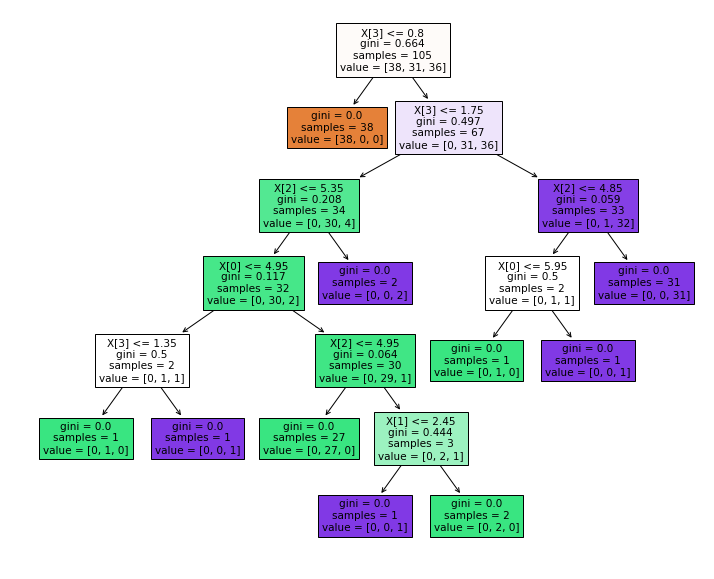

In [9]:
plt.figure(figsize=(12,10))
plot_tree(dt_classifier,filled=True)

In [10]:
dt_classifier = DecisionTreeClassifier(criterion='entropy',max_depth=5)
dt_classifier.fit(X_train,y_train)

train_score = dt_classifier.score(X_train,y_train)
test_score = dt_classifier.score(X_test,y_test)

y_pred = dt_classifier.predict(X_test)
mse = mean_squared_error(y_test,y_pred)

print('R-squared Train score:',train_score)
print('R-squared Test score:',test_score)
print('Predict:',y_pred)
print('MSE:',mse)
print('R-MSE:',mse**(1/2.0))

R-squared Train score: 0.9809523809523809
R-squared Test score: 0.9777777777777777
Predict: [0 1 2 1 2 2 1 2 1 2 2 0 1 0 2 0 0 2 2 2 1 0 2 1 1 1 1 1 0 1 0 1 0 0 1 1 1
 2 1 0 1 1 0 1 2]
MSE: 0.022222222222222223
R-MSE: 0.14907119849998599
